In [ ]:
%pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.4 MB 2.1 MB/s            
     |████████████████████████████████| 341 kB 94.5 MB/s            
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import zipfile
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
 #see Pipeline.ipynb - csvs for convenience so as not to go through the pipeline each time and debug the pipeline and models separately
train = pd.read_csv('./new_train_with_iso.csv')
test = pd.read_csv('./new_test_with_iso.csv')


In [ ]:
x_train = train.drop('target', axis=1)
y_train = train['target']
x_test = test.drop('target', axis=1)
y_test = test['target']
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1385812, 54), (346454, 54), (1385812,), (346454,))


## Base Models

In [ ]:
#try some basic algorithms with default paramteters

In [ ]:
rf=RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
rf_probs = rf.predict_proba(x_test)

rf_probs = rf_probs[:, 1]

rf_auc = roc_auc_score(y_test, rf_probs)
print('RF ROC AUC=%.3f' % (rf_auc))

RF ROC AUC=0.620


In [ ]:
rf_probs = rf.predict_proba(x_train)

rf_probs = rf_probs[:, 1]
# рассчитываем ROC AUC-
rf_auc = roc_auc_score(y_train, rf_probs)
print('RF train ROC AUC=%.3f' % (rf_auc))

RF train ROC AUC=0.997


In [ ]:
grad = GradientBoostingClassifier().fit(x_train, y_train)

In [ ]:
probs = grad.predict_proba(x_test)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_test, probs)
print('test ROC AUC=%.3f' % (clf_auc))

probs = grad.predict_proba(x_train)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_train, probs)
print('train ROC AUC=%.3f' % (clf_auc))

LR ROC AUC=0.666
train LR ROC AUC=0.672


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier().fit(x_train, y_train)


In [ ]:
mlp_probs = mlp.predict_proba(x_test)
mlp_probs = mlp_probs[:, 1]
# рассчитываем ROC AUC
mlp_auc = roc_auc_score(y_test, mlp_probs)
print('test ROC AUC=%.3f' % (mlp_auc))

probs = mlp.predict_proba(x_train)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_train, probs)
print('train ROC AUC=%.3f' % (clf_auc))

test ROC AUC=0.665
train ROC AUC=0.681


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier().fit(x_train, y_train)

In [ ]:
probs = tree_clf.predict_proba(x_test)
probs = probs[:, 1]
# рассчитываем ROC AUC
_auc = roc_auc_score(y_test,probs)
print('test ROC AUC=%.3f' % (_auc))

probs = tree_clf.predict_proba(x_train)
probs = probs[:, 1]
# рассчитываем ROC AUC
_auc = roc_auc_score(y_train, probs)
print('train ROC AUC=%.3f' % (_auc))

test ROC AUC=0.516
train ROC AUC=0.998


In [ ]:
tree_clf=DecisionTreeClassifier().fit(x_resampled, y_resampled)

In [ ]:
probs = tree_clf.predict_proba(x_test)
probs = probs[:, 1]
# рассчитываем ROC AUC
_auc = roc_auc_score(y_test,probs)
print('test ROC AUC=%.3f' % (_auc))

probs = tree_clf.predict_proba(x_resampled)
probs = probs[:, 1]
# рассчитываем ROC AUC
_auc = roc_auc_score(y_resampled, probs)
print('train ROC AUC=%.3f' % (_auc))

test ROC AUC=0.555
train ROC AUC=1.000


In [ ]:
isf = IsolationForest()
x_train_norm = train[train['target']==0].drop('target', axis=1)
isf = IsolationForest().fit(x_train_norm)




In [ ]:
x_train_norm.shape

(1345561, 54)

In [ ]:
isf_test = isf.predict(x_test)

In [ ]:
isf_test
iso_y_test = y_test.replace(1, -1).replace(0, 1)

In [ ]:
iso_y_test.value_counts()

target
 1    336391
-1     10063
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

target
0    336391
1     10063
Name: count, dtype: int64

In [ ]:
cm = confusion_matrix(iso_y_test, isf_test, normalize=None)

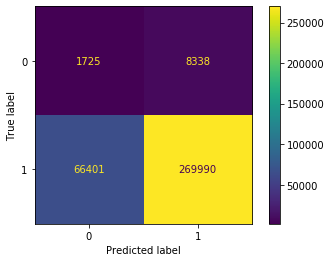

In [ ]:
vis = ConfusionMatrixDisplay(confusion_matrix=cm)
vis.plot()
plt.show()

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier().fit(x_train, y_train)

In [ ]:
probs = model.predict_proba(x_test)
probs = probs[:, 1]
# рассчитываем ROC AUC
auc = roc_auc_score(y_test, probs)
print('test ROC AUC=%.3f' % (auc))

probs = model.predict_proba(x_train)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_train, probs)
print('train ROC AUC=%.3f' % (clf_auc))

test ROC AUC=0.664
train ROC AUC=0.668


In [ ]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

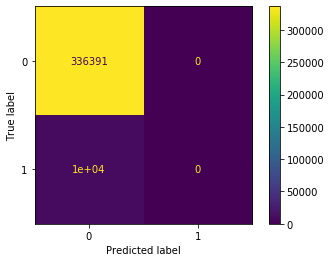

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=model.predict(x_test), normalize=None)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
vis.plot()
plt.show()

## Try tuning

In [ ]:
grad = GradientBoostingClassifier(n_estimators=200, verbose=1).fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2616           16.18m
         2           0.2606           15.83m
         3           0.2598           15.81m
         4           0.2591           15.74m
         5           0.2586           15.73m
         6           0.2581           15.73m
         7           0.2577           15.65m
         8           0.2573           15.58m
         9           0.2570           15.45m
        10           0.2567           15.32m
        20           0.2549           14.59m
        30           0.2540           13.82m
        40           0.2534           13.02m
        50           0.2529           12.20m
        60           0.2526           11.40m
        70           0.2523           10.60m
        80           0.2520            9.80m
        90           0.2518            8.99m
       100           0.2516            8.18m
       200           0.2503            0.00s


In [ ]:
probs = grad.predict_proba(x_test)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_test, probs)
print('test ROC AUC=%.3f' % (clf_auc))

probs = grad.predict_proba(x_train)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_train, probs)
print('train ROC AUC=%.3f' % (clf_auc))

test ROC AUC=0.670
train ROC AUC=0.679


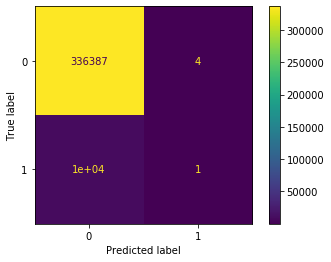

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=grad.predict(x_test), normalize=None)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grad.classes_)
vis.plot()
plt.show()

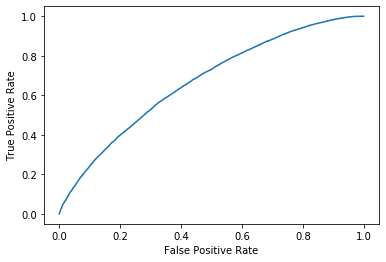

In [ ]:
fpr, tpr, _ =  roc_curve(y_test,  grad.predict_proba(x_test)[:, 1])
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
confusion_matrix(y_true=y_test, y_pred=grad.predict(x_test))

array([[336387,      4],
       [ 10062,      1]])

In [ ]:
model = XGBClassifier(n_iterators=200).fit(x_train, y_train)

In [ ]:
probs = model.predict_proba(x_test) z
probs = probs[:, 1]
# рассчитываем ROC AUC
auc = roc_auc_score(y_test, probs)
print('test ROC AUC=%.3f' % (auc))

probs = model.predict_proba(x_train)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_train, probs)
print('train ROC AUC=%.3f' % (clf_auc))

test ROC AUC=0.664
train ROC AUC=0.668


In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(100, 50)).fit(x_train, y_train)


In [ ]:
mlp_probs = mlp.predict_proba(x_test)
mlp_probs = mlp_probs[:, 1]
# рассчитываем ROC AUC
mlp_auc = roc_auc_score(y_test, mlp_probs)
print('test ROC AUC=%.3f' % (mlp_auc))

probs = mlp.predict_proba(x_train)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_train, probs)
print('train ROC AUC=%.3f' % (clf_auc))

test ROC AUC=0.668
train ROC AUC=0.689


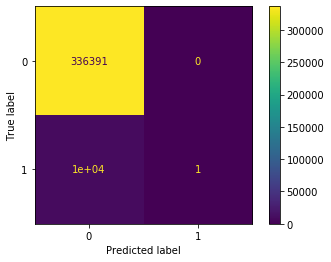

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=mlp.predict(x_test), normalize=None)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=mlp.classes_)
vis.plot()
plt.show()

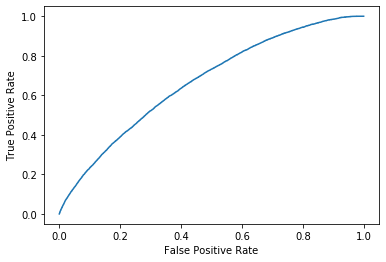

In [ ]:
fpr, tpr, _ =  roc_curve(y_test,  mlp.predict_proba(x_test)[:, 1])
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#
## Try on resampled

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

In [ ]:
grad = GradientBoostingClassifier(n_estimators=200).fit(x_resampled, y_resampled)

In [ ]:
probs = grad.predict_proba(x_test)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_test, probs)
print('test ROC AUC=%.3f' % (clf_auc))

probs = grad.predict_proba(x_resampled)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_resampled, probs)
print('train ROC AUC=%.3f' % (clf_auc))

test ROC AUC=0.669
train ROC AUC=0.687


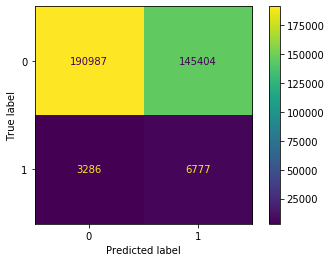

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=grad.predict(x_test), normalize=None)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grad.classes_)
vis.plot()
plt.show()

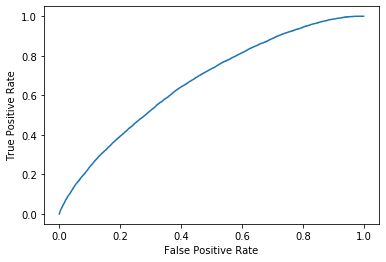

In [ ]:
fpr, tpr, _ =  roc_curve(y_test,  grad.predict_proba(x_test)[:, 1])
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, verbose=1).fit(x_resampled, y_resampled)


Iteration 1, loss = 0.66735893
Iteration 2, loss = 0.65613149
Iteration 3, loss = 0.65114561
Iteration 4, loss = 0.64798270
Iteration 5, loss = 0.64524802
Iteration 6, loss = 0.64332809
Iteration 7, loss = 0.64114317
Iteration 8, loss = 0.63963158
Iteration 9, loss = 0.63832565
Iteration 10, loss = 0.63665591
Iteration 11, loss = 0.63542448
Iteration 12, loss = 0.63369413
Iteration 13, loss = 0.63222013
Iteration 14, loss = 0.63103980
Iteration 15, loss = 0.63023728
Iteration 16, loss = 0.62893368
Iteration 17, loss = 0.62736046
Iteration 18, loss = 0.62685824
Iteration 19, loss = 0.62591543
Iteration 20, loss = 0.62454359
Iteration 21, loss = 0.62335505
Iteration 22, loss = 0.62239804
Iteration 23, loss = 0.62100313
Iteration 24, loss = 0.62068503
Iteration 25, loss = 0.61921804
Iteration 26, loss = 0.61860764
Iteration 27, loss = 0.61781374
Iteration 28, loss = 0.61701593
Iteration 29, loss = 0.61579257
Iteration 30, loss = 0.61497531
Iteration 31, loss = 0.61461641
Iteration 32, los

In [ ]:

mlp_probs = mlp.predict_proba(x_test)
mlp_probs = mlp_probs[:, 1]
# рассчитываем ROC AUC
mlp_auc = roc_auc_score(y_test, mlp_probs)
print('test ROC AUC=%.3f' % (mlp_auc))

probs = mlp.predict_proba(x_resampled)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_resampled, probs)
print('train ROC AUC=%.3f' % (clf_auc))

test ROC AUC=0.668
train ROC AUC=0.691


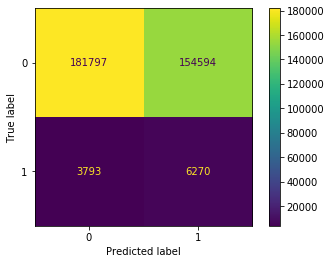

In [ ]:

conf_matrix = confusion_matrix(y_true=y_test, y_pred=mlp.predict(x_test), normalize=None)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=mlp.classes_)
vis.plot()
plt.show()

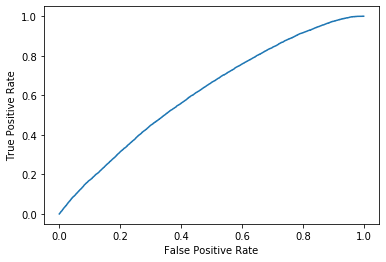

In [ ]:

fpr, tpr, _ =  roc_curve(y_test,  mlp.predict_proba(x_test)[:, 1])
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#

model = XGBClassifier(n_iterators=200).fit(x_resampled, y_resampled)

In [ ]:

probs = model.predict_proba(x_test)
probs = probs[:, 1]
# рассчитываем ROC AUC
auc = roc_auc_score(y_test, probs)
print('test ROC AUC=%.3f' % (auc))

probs = model.predict_proba(x_resampled)
probs = probs[:, 1]
# рассчитываем ROC AUC
clf_auc = roc_auc_score(y_resampled, probs)
print('train ROC AUC=%.3f' % (clf_auc))

test ROC AUC=0.666
train ROC AUC=0.676


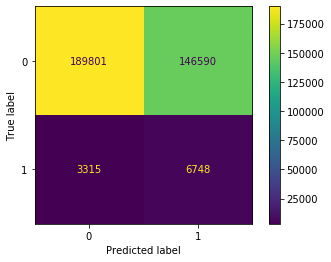

In [ ]:

conf_matrix = confusion_matrix(y_true=y_test, y_pred=model.predict(x_test), normalize=None)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
vis.plot()
plt.show()

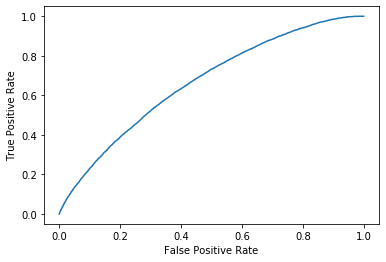

In [ ]:

fpr, tpr, _ =  roc_curve(y_test,  model.predict_proba(x_test)[:, 1])
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Feature Importances

In [ ]:

feats = {}
for feature, importance in zip(x_train.columns, grad.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances

,Features,Importance
0,utm_adcontent_freq,0.147807
1,utm_adcontent_freqisf,0.135993
2,utm_source_freq,0.134792
3,utm_medium_freqisf,0.075386
4,paid_trafficisf,0.072382
5,utm_source_freqisf,0.047802
6,paid_traffic,0.033953
7,lng,0.024960
8,top_3_campaigns,0.024272
9,device_screen_resolutionisf,0.022200


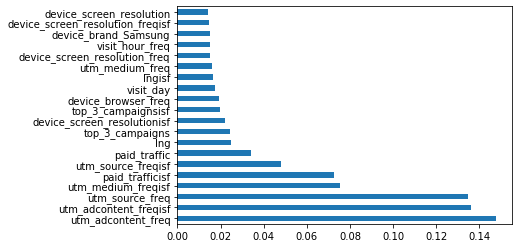

In [ ]:

pd.Series(grad.feature_importances_, index=x_train.columns).nlargest(20).plot(kind='barh')

In [ ]:

grad

GradientBoostingClassifier(n_estimators=200)